<a href="https://colab.research.google.com/github/vadev/Handwriting_Personality/blob/main/HandWritingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv(r"/content/A_Z Handwritten Data.csv").astype('float32') # reading dataset 
print(data.head(10)) # printing the first 10 images for now

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[10 rows x 785 columns]


In [4]:
# Split the data into images and their labels. 
X = data.drop('0', axis=1) 
y = data['0']

In [5]:
# Reshape the data from the csv file so it can display as an image content. 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28)) # converting to 28x28 pixels
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28)) # converting to 28x28 pixels
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (57836, 28, 28)
Test data shape:  (14460, 28, 28)


In [6]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

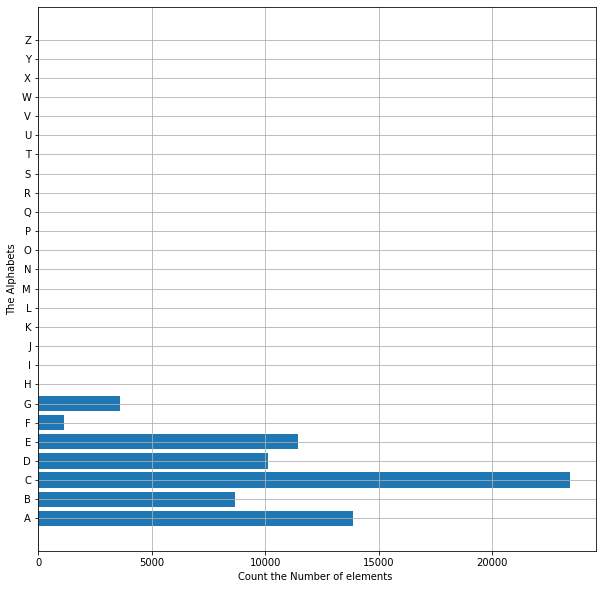

In [7]:
# Then plotting the number of alphabets in the datasets 
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = [] # creats a list for the alphabets containing all the characters using the value() function. 
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count) # using the count and alphabets to draw a horizontal bar plot
plt.xlabel("Count the Number of elements ") # label for x axis
plt.ylabel("The Alphabets") # label for y axis
plt.grid()
plt.show()

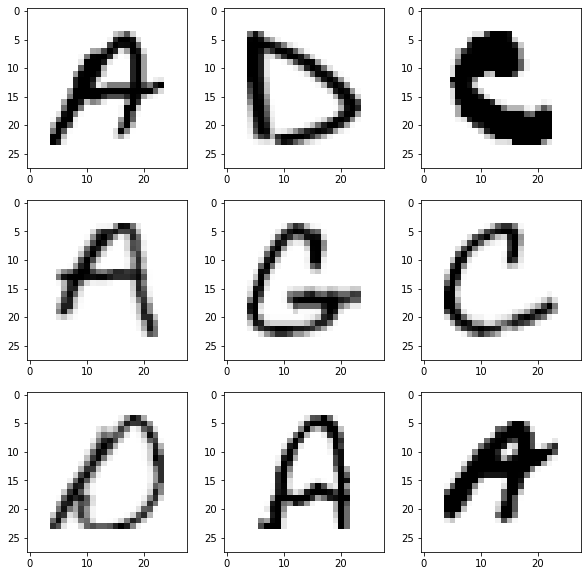

In [10]:
# Then we shuffle the data 
shuff = shuffle(train_x[:100])  # shuffles some of the image from the train area. 

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9): # then creates a 9 plot in 3x3 shaped to display the thresholded images of 9 alphabets (as of now)
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [11]:
# Data reshaping -- meaning reshaping the training and test datasets so we can create our model. 
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("The new shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("The new shape of train data: ", test_X.shape)


The new shape of train data:  (57836, 28, 28, 1)
The new shape of train data:  (14460, 28, 28, 1)


In [12]:
# next we need to convert from float values to categorical values. 
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)

The new shape of train labels:  (57836, 26)
The new shape of test labels:  (14460, 26)


In [13]:
# Making CNN to work in this process
model = Sequential() # from keras models

# Design the CNN model over our training dataset 
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))


In [16]:
# Compile our model
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit our model
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))


1808/1808 [==============================] - 77s 42ms/step - loss: nan - accuracy: 0.2638 - val_loss: nan - val_accuracy: 0.1956


In [17]:
model.summary()
model.save(r'handW_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [18]:
# We want to print our train and validation accuracies and or even our losses
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.19564315676689148]
The training accuracy is : [0.2102842479944229]
The validation loss is : [nan]
The training loss is : [nan]


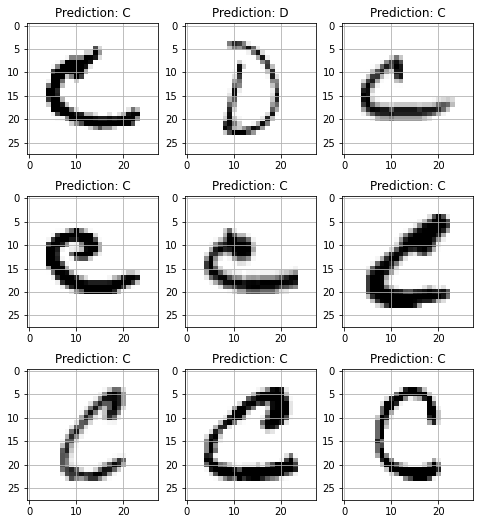

In [72]:
# Lets do some prediction on test data 
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i, ax in enumerate(axes): 
  img = np.reshape(test_X[i], (28,28))
  ax.imshow(img, cmap="Greys")

  pred = word_dict[np.argmax(test_yOHE[i])]
  ax.set_title("Prediction: "+pred) 
  ax.grid()

  

In [82]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


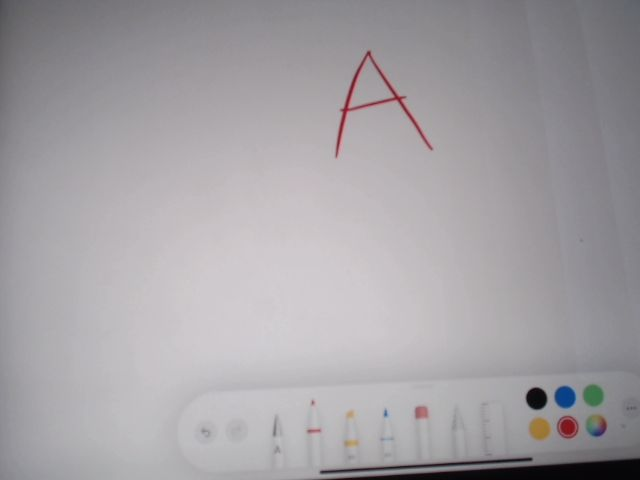

In [83]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [84]:
# Now doing prediction on a external image 
img = cv2.imread('/content/photo.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 400))
 



In [85]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [86]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0   184k      0 --:--:-- --:--:-- --:--:--  184k


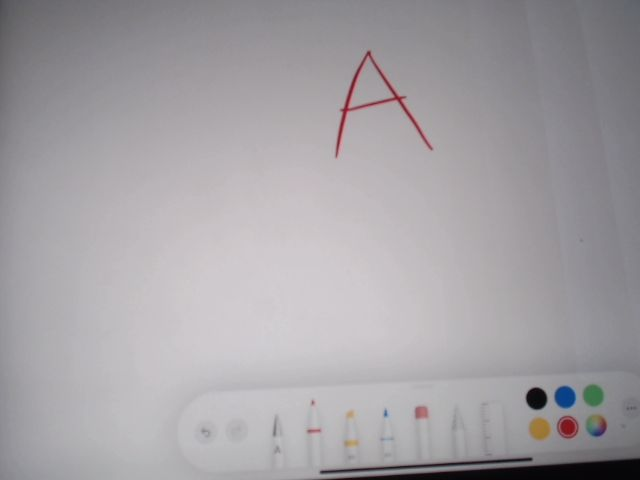

In [87]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('/content/photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

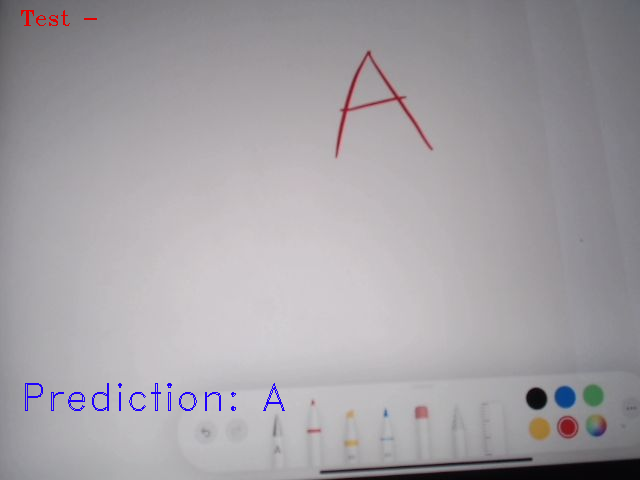

In [88]:
from google.colab.patches import cv2_imshow
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Test -  ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2_imshow(img)
# cv2.imshow('Handwritten character recognition', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# while (1):
#     k = cv2.waitKey(1) & 0xFF
#     if k == 27:
#         break
# cv2.destroyAllWindows()